## multi-class 클래스가 2개보다 많을때
클래스 2개 초과 될때 
- 2진 분류(클래스 2개일때) 에서는 타겟(찾고 싶은 y)만 찾으려고 했다.
- x feed, model(x) = x의 클래스가 1일 확률, x가 클래스 0일 확률 = 1 - p(x,y=1)
- 클래스 갯수 k=3 개다. 
- model(x) = x가 클래스 0일 확률, x가 클래스 1일 확률, x가 클래스 2일 확률

In [2]:
import numpy as np

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
np.exp(0), np.exp(1), np.exp(2), np.exp(3) # exponencial 지수 함수

(1.0, 2.7182818284590451, 7.3890560989306504, 20.085536923187668)

In [8]:
np.exp(-1), np.exp(-2), np.exp(-3)

(0.36787944117144233, 0.1353352832366127, 0.049787068367863944)

In [13]:
np.set_printoptions(6, suppress=True)
y = [0, 1]
h = np.array([-10, 10])
#h = WX + b
# y = sigmoid(h)
sigmoid(h)

array([ 0.000045,  0.999955])

In [15]:
# 클래스 3개가 존재할때 한 샘플에 대해서 다음과 같은 예측이 나왔습니다
h = np.array([[2.0, 1.0, 0.1]]) # 한 샘플에 대한 예측값, 확률로 바꾸자
norm = h/np.sum(h)
norm

array([[ 0.645161,  0.322581,  0.032258]])

In [18]:
h_e = np.exp(h)
h, h_e

(array([[ 2. ,  1. ,  0.1]]), array([[ 7.389056,  2.718282,  1.105171]]))

In [20]:
softmax = h_e/np.sum(h_e)
softmax

array([[ 0.659001,  0.242433,  0.098566]])

In [ ]:
y = [0, 1, 2]
y_hot = [[1,0,0], [0,1,0], [0,0,1]] # one-hot 인코딩 
h     = [[0.999, 0.0001, 0], [0, 0.99, 0], [0.001, 0.1, 0.88]] # 정확한 예측이 나왔다

붓꽃 데이터 전부를 학습시켜 봅시다

In [49]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [50]:
x, y = load_iris(True)
x.shape, y.shape, set(y)

((150, 4), (150,), {0, 1, 2})

In [57]:
x_norm = (x - np.min(x, 0))/(np.max(x, 0)-np.min(x, 0))

In [82]:
model = LogisticRegression(max_iter=3000).fit(x, y) # underfitting 과소적합
model.score(x_norm, y)# accuracy |

0.91333333333333333

In [83]:
model.coef_, model.intercept_

(array([[ 0.414988,  1.461297, -2.262141, -1.029095],
        [ 0.41664 , -1.600833,  0.577658, -1.385538],
        [-1.707525, -1.534268,  2.470972,  2.555382]]),
 array([ 0.265606,  1.085424, -1.214715]))

In [84]:
#첫번째 샘플로 테스트해봅시다
x0 = x[0]
y0 = y[0]
x0, y0 

(array([ 5.1,  3.5,  1.4,  0.2]), 0)

In [86]:
# y = softmax(WX + b)
h = np.sum(model.coef_ * x0, axis=1) + model.intercept_
h # 점수

array([  4.123771,  -1.861017, -11.322595])

In [89]:
#보기 불편하니까 확률로 바꿔보자
h_e = np.exp(h)
p = h_e / np.sum(h_e)
h_e, p

(array([ 61.79181 ,   0.155514,   0.000012]),
 array([ 0.997489,  0.00251 ,  0.      ]))

In [104]:
from sklearn.datasets import load_digits
x, y = load_digits(return_X_y=True)
x.shape, y.shape, len(x)

((1797, 64), (1797,), 1797)

In [133]:
m = len(x)//2
x_train = x[:m]
y_train = y[:m]
x_test = x[m:]
y_test = y[m:]

학습용:테스트용 50:50 나눠서 학습용으로만 학습, 테스트셋 성능을 측정해보세요
성능이 95%이상 되도록 레이어를 디자인하세요

In [136]:
# 히든 레이어를 디자인할 수 있습니다
model = MLPClassifier(hidden_layer_sizes=(128,128,128),max_iter=3000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.93548387096774188)

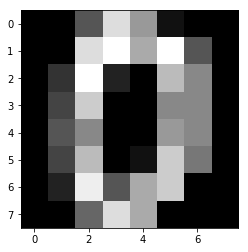

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x[0].reshape((8,8)), cmap='gray')

In [143]:
x0 = x[0].reshape((8,8))
x1 = x[1].reshape((8,8))
x2 = np.concatenate((x0, x1), axis=1)
x0.shape, x1.shape, x2.shape

((8, 8), (8, 8), (8, 16))

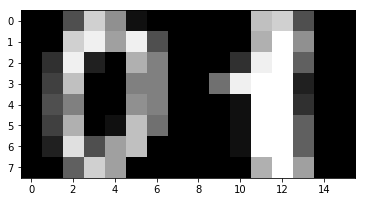

In [142]:
plt.imshow(x2, cmap='gray')

In [176]:
from sklearn.datasets import load_digits
x, y = load_digits(return_X_y=True)
#데이터 2개 합성
x0 = np.concatenate((x[0].reshape((8,8)), x[1].reshape((8,8))), axis=1)
x1 = np.concatenate((x[2].reshape((8,8)), x[3].reshape((8,8))), axis=1)
y0 = y[:2]
y1 = y[2:4]

In [163]:
#데이터 묶기
x0 = np.reshape(x0, [-1])
x1 = np.reshape(x1, [-1])
x_train = np.stack((x0, x1),0)
y_train = np.stack((y0, y1),0)
x_train.shape, y_train.shape

((2, 128), (2, 2))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
model = MultiOutputClassifier(MLPClassifier()).fit(x_train, y_train)
model.predict(x_train), model.score(x_train, y_train)

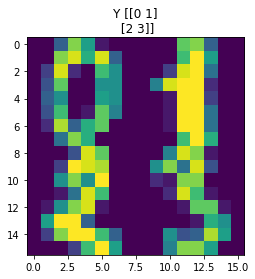

In [192]:
plt.title('Y '+ str(y_train))
plt.imshow(x_train.reshape((-1,16)))

In [211]:
x, y = load_digits(return_X_y=True)
m = len(y)//2
x_train = x[:m]
y_train = y[:m]
x_test = x[m:m*2]
y_test = y[m:m*2]
x_train.shape, y_train.shape

((898, 64), (898,))

In [215]:
# for 으로 데이터 만들기
x_list = []
y_list = []
for i in range(len(y_train)//2):
    xx = np.stack((x_train[i*2], x_train[i*2+1]),0)
    yy = np.stack((y_train[i*2], y_train[i*2+1]),0)
    x_list.append(xx.reshape([-1]))
    y_list.append(yy.reshape([-1]))
x_train = np.stack(x_list, 0)
y_train = np.stack(y_list, 0)
x_train.shape, y_train.shape

((449, 128), (449, 2))

In [ ]:
x_train = np.reshape(x_train, [m//2, -1])
y_train = np.reshape(y_train, [m//2, 2])
x_test = np.reshape(x_test, [m//2, -1])
y_test = np.reshape(y_test, [m//2, 2])
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [209]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,100), max_iter=1000)
model = MultiOutputClassifier(mlp).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.68374164810690419)

In [210]:
y_test

array([[8, 8],
       [4, 9],
       [0, 8],
       [9, 8],
       [1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [9, 0],
       [1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [9, 0],
       [1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [9, 0],
       [9, 5],
       [5, 6],
       [5, 0],
       [9, 8],
       [9, 8],
       [4, 1],
       [7, 7],
       [3, 5],
       [1, 2],
       [7, 8],
       [2, 0],
       [1, 2],
       [6, 3],
       [3, 7],
       [3, 3],
       [4, 6],
       [6, 6],
       [4, 9],
       [1, 5],
       [0, 9],
       [5, 2],
       [8, 2],
       [0, 0],
       [1, 7],
       [6, 3],
       [2, 1],
       [4, 6],
       [3, 1],
       [3, 9],
       [1, 7],
       [6, 8],
       [4, 3],
       [1, 4],
       [0, 5],
       [3, 6],
       [9, 6],
       [1, 7],
       [5, 4],
       [4, 7],
       [2, 8],
       [2, 2],
       [5, 7],
       [9, 5],
       [4, 4],
       [9, 0],
       [8, 9],
       [8, 0],
       [1,